# SVD

Sadržaj:
- [Određivanje SVD](#Određivanje-SVD)
- [Redukovana SVD](#Redukovana-SVD)
- [Mur-Penrouzov inverz](#Mur-Penrouzov-inverz)
- [Problem najmanjih kvadrata](#Problem-najmanjih-kvadrata)

In [1]:
import numpy as np
import numpy.random as rndm
import matplotlib as mplb
import matplotlib.pyplot as plt
import scipy.linalg as spl

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

Dekompozicija matrice na singularne vrednosti i vektore, kraće označena sa SVD (Singular Value Decomposition) je faktorizacija koja se javlja kao korak u mnogim algoritmima primenjene linearne algebre. Jednako je važna i u konceptualnom smislu jer opisuje mnoga svojstva faktorizovane matrice. Singularne vrednosti matrice predstavljaju uopštenje koncepta sopstvenih vrednosti kvadratnih matrica i postoje za proizvoljnu kvadratnu ili pravougaonu matricu. 
Ovom vrstom faktorizacije prevazilaze se problemi na koje se nailazi u postupku dijagonalizacije kvadratnih matrica, i tom prilikom zadržavaju najbitnija svojstva ortogonalne dijagonalizacije simetričnih matrica.

Polazna osnova SVD postupka jeste da proizvoljna realna pravougaona matrica $A\in\mathcal{M}_{m\times n}$ predstavlja linearno preslikavanje $n-$dimenzionalnog vektorskog prostora u $m-$dimenzionalni prostor, $A:\mathbb{R}^n\to\mathbb{R}^m.$  Pravougaone matrice deluju nad različitim prostorima. Prirodno je pitanje mogu li se naći dve ortonormirane baze, jedna baza domena $\mathbb{R}^n$ i jedna baza kodomena $\mathbb{R}^m,$ koje će kroz najjednostavniju formu matrice $A$  opisati njena svojstva kako fundamenatalnih potprostora tako i geometrijska svojstva transformacije koju ova matrica indukuje.

SVD predstavlja ortogonalnu dekompoziciju pravougaone matrice $A$ u formi 
$$A=U\begin{bmatrix} \Sigma_{r\times r}&O_{r\times(n-r)}\\O_{(m-r)\times r}&O_{(m-r)\times(n-r)}\end{bmatrix} V^T=U\Sigma V^T,$$
u kojoj je matrica $\Sigma_{r\times r}$ dijagonalna sa pozitivnim elementima na glavnoj dijagonali, a matrice $U\in\mathcal{M}_{m\times m}$ i $V\in\mathcal{M}_{n\times n}$ su ortogonalne. 
Određivanje SVD podrazumeva određivanje ortogonalnih matrica  $U$ i $V$ i dijagonalne matrice $\Sigma\in\mathcal{M}_{m\times n},$ sa nenegativnim dijagonalnim elementima. Izraz $A=U\Sigma V^T$ nazivamo puna SVD.

Izgled pune $SVD$ dekompozicije za različite odnose dimenzija vrsta i kolona matrice dat je na narednoj slici. U matrici $\Sigma$ naznačeno je prostiranje nenegativnih dijagonalnih elemenata.
<div>
   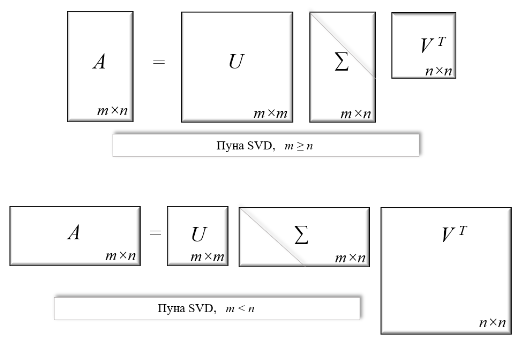  
</div> 

Pozitivni dijagonalni elementi $\sigma_i$ matrice $\Sigma,$ tj. dijagonalni elementi bloka $\Sigma_{r\times r},$ nazivaju se singularne vrednosti matrice $A.$ Njihov broj odredjuje rang matrice $A,$ tj. dimenziju prostora slika matrice $A.$  
Kolone matrice $U$ nazivaju se levi singularni vektori, a kolone matrice $V$ su desni singularni vektori. To je posledica sledećih jednakosti.

Označimo kolone ortogonalnih matrica $U$ i $V$ sa $u_i$ i $v_i$ kolone ortogonalnih matrica,
$$U=\left[\begin{array}{c|c|c|c}
\phantom{w}&\phantom{w}&\phantom{w}&\phantom{w}\\
u_1&u_2&\dots&u_m\\ \phantom{w}&\phantom{w}&\phantom{w}&\phantom{w}
\end{array}\right]\qquad\mbox{ i }\qquad V=\left[\begin{array}{c|c|c	|c}
\phantom{w}&\phantom{w}&\phantom{w}&\phantom{w}\\
v_1&v_2&\dots&v_n\\ \phantom{w}&\phantom{w}&\phantom{w}&\phantom{w}
\end{array}\right]$$ 
i singularne vrednosti dijagonalne matrice $\Sigma$
$$\Sigma=\left[\begin{array}{cccc|ccc}
\sigma_1&0&\dots&0&0&\dots&0\\
0&\sigma_2&\dots&0&0&\dots&0\\
\vdots&\vdots&&\vdots&\vdots&&\vdots\\
0&0&\dots&\sigma_r&0&\dots&0\\\hline
0&0&\dots&0&0&\dots&0\\
\vdots&\vdots&&\vdots&\vdots&&\vdots\\
0&0&\dots&0&0&\dots&0
\end{array}\right]_{m\times n}.$$
Jednakost $A=U\Sigma V^T$ možemo da zapišemo u obliku
$$AV=U\Sigma\qquad\mbox{ i }\qquad U^TA=\Sigma V^T,$$
tj.
$$Av_i=\sigma_iu_i,\qquad u_i^TA=\sigma_iv_i^T,\qquad
i=1,2,\dots,r.$$

Jednakost $A=U\Sigma V^T$ posmatrana kao transformacija jedinične sfere $n-$dimenzionalnog prostora može se analizirati kroz korake. Ključno je razumevanje dejstva ortogonalnih matrica na jediničnu sferu. Naime, ortogonalne transformacije čuvaju rastojanja i uglove. Zbog toga je slika ortonormirane baze ponovo ortonormirana baza. Ortogonalna matrica vrši samo promenu koordinatnog sistema u vektorskom prostoru. Zbog toga je slika ortogonalnom transformacijom jedinične sfere ponovo jedinična sfera.

**Primer 1.** Potražićemo sliku jedinične sfere ortogonalnom transformacijom u 2D i 3D. Specijalno su naznačeni vektori kanonske baze i njihove slike. S obzirom da se njihove slike dobijaju proizvodom $QI=Q,$ lako zaključujemo da su upravo kolone ortogonalne matrice slike kanonske baze.

In [2]:
fi=2.27
Q2=np.array([[np.cos(fi),np.sin(fi)],[-np.sin(fi),np.cos(fi)]])
teta=np.linspace(0,2*np.pi,50)
jedin_kruz=np.array([np.cos(teta),np.sin(teta)])

In [3]:
np.round(Q2.T@Q2,3)  #provera ortogonalnosti

array([[ 1., -0.],
       [-0.,  1.]])

In [4]:
slike=Q2@jedin_kruz
norme_slika=np.linalg.norm(slike,axis=0)

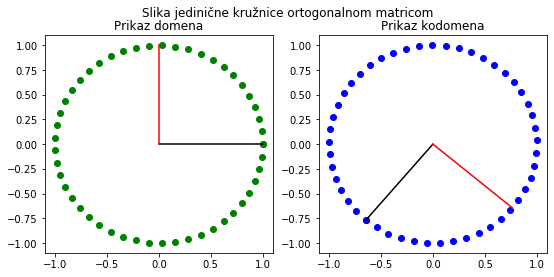

In [5]:
slika, ax = plt.subplots(1, 2,figsize=(9,4)) 
slika.suptitle('Slika jedinične kružnice ortogonalnom matricom')
slika.subplots_adjust(hspace=0.5)

plt.subplot(1, 2, 1)           #(broj_vrsta, broj_kolona, redni_broj_slike)  
plt.title("Prikaz domena")  
plt.plot(jedin_kruz[0],jedin_kruz[1],'og')
plt.plot([0,1],[0,0],'-k')
plt.plot([0,0],[0,1],'-r')

plt.subplot(1, 2, 2)           #(broj_vrsta, broj_kolona, redni_broj_slike)  
plt.title("Prikaz kodomena")  
plt.plot(slike[0],slike[1],'ob') 
plt.plot([0,Q2[0,0]],[0,Q2[1,0]],'-k')
plt.plot([0,Q2[0,1]],[0,Q2[1,1]],'-r');

In [6]:
n=50
theta = np.linspace(0, 2 * np.pi, n)
phi = np.linspace(0, np.pi, n)
KosTet=np.cos(theta)
SinTet=np.sin(theta)
KosFi=np.cos(phi)
SinFi=np.sin(phi)

In [7]:
A=rndm.uniform(-5,5,(3,3))
Q3,_=np.linalg.qr(A)

In [8]:
np.round(Q3.T@Q3,3)  #provera ortogonalnosti

array([[ 1.,  0.,  0.],
       [ 0.,  1., -0.],
       [ 0., -0.,  1.]])

In [9]:
x =  np.outer(KosTet, SinFi)
y =  np.outer(SinTet, SinFi)
z =  np.outer(np.ones(n), KosFi)
jed_sfera=np.array([x.reshape(n*n,),y.reshape(n*n,),z.reshape(n*n,)])
slike=Q3@jed_sfera
Xs=(slike[0]).reshape(n,n)
Ys=(slike[1]).reshape(n,n)
Zs=(slike[2]).reshape(n,n)

In [10]:
%matplotlib notebook

<IPython.core.display.Javascript object>


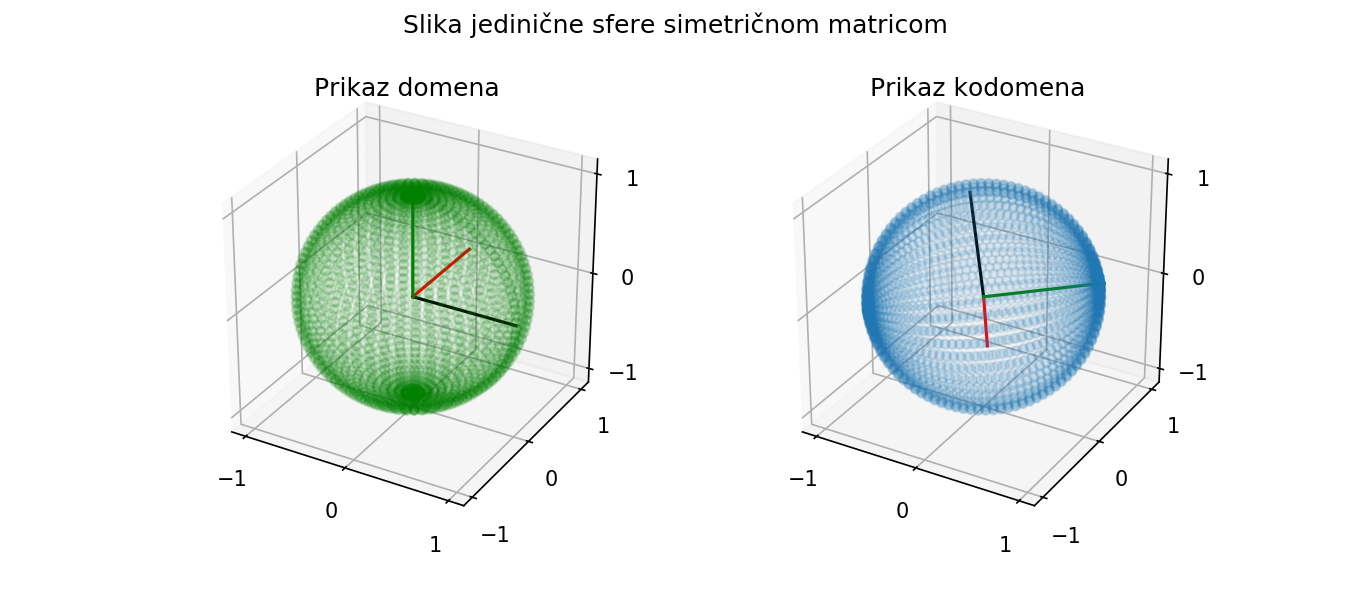

In [11]:
slika=plt.figure(figsize=(9,4)) 
slika.suptitle('Slika jedinične sfere simetričnom matricom')
slika.subplots_adjust(hspace=0.5)

ax1 = slika.add_subplot(1, 2, 1, projection='3d')
plt.title("Prikaz domena") 
ax1.set_xticks([-1, 0, 1])
ax1.set_yticks([-1, 0, 1])
ax1.set_zticks([-1, 0, 1])
#ax1.plot_surface(x, y, z , cmap=cm.gist_heat, alpha=0.5);
ax1.scatter(x,y,z, marker='o',color='green',alpha=0.1)
plt.plot([0,1],[0,0],[0,0],'-k')
plt.plot([0,0],[0,1],[0,0],'-r')
plt.plot([0,0],[0,0],[0,1],'-g')

ax2 = slika.add_subplot(1, 2, 2, projection='3d')
plt.title("Prikaz kodomena") 
ax2.set_xticks([-1, 0, 1])
ax2.set_yticks([-1, 0, 1])
ax2.set_zticks([-1, 0, 1])
#ax2.plot_surface(Xs, Ys, Zs , cmap='ocean', alpha=0.5)
ax2.scatter(Xs, Ys, Zs, marker='o',color='C0',alpha=0.1)
plt.plot([0,Q3[0,0]],[0,Q3[1,0]],[0,Q3[2,0]],'-k')
plt.plot([0,Q3[0,1]],[0,Q3[1,1]],[0,Q3[2,1]],'-r')
plt.plot([0,Q3[0,2]],[0,Q3[1,2]],[0,Q3[2,2]],'-g');

plt.show()

Prethodni primeri potvrđuju svojstva ortogonalne transformacije. Zbog toga SVD matrice $A$ opisuje geometriju transformacije indukovane njom. Ortogonalna matrica $V^T$ najpre vrši zamenu ortonormirane baze u ortonormiranu bazu. Zbog toga jedinicna sfera ostaje jedinična sfera $n-$dimenzionalnog prostora  bilo kojom ortogonalnom transformacijom. Vektori nove ortonormirane baze su $v_i.$ Dijagonalna matrica $\Sigma$ vrši istezanje ili kontrakciju sfere duž vektora $v_i$ u elipsoid. Zbog toga vektori $v_i$ predstavljaju glavne ose tog elipsoida. Istovremeno pravougaona dijagonalna matrica $\Sigma:\mathbb{R}^n\mapsto\mathbb{R}^m$ ugradjuje elipsoid $n-$dimenzionalnog prostora u $m-$dimenzionalno okruženje. Ortogonalna matrica $U$ menja bazu glavnih osa u nove glavne ose $u_j\in\mathbb{R}^m.$ Zaključujemo da matrica $A$ slika jediničnu sferu u elipsoid. Dimenzija potprostora kroz koji se elipsoid prostire jednaka je broju nenula dijagonalnih vrednosti matrice $\Sigma,$ tj. rangu matrice $A.$

Prikazaćemo ovo svojstvo na primeru matrice male dimenzije.

**Primer 2.** Potražičemo sliku jedinične sfere matricom $A=\begin{bmatrix}4&11&14\\8&7&-2\end{bmatrix}.$

In [12]:
A=np.array([[4,11.,14],[8,7,-2]])

In [13]:
n=50
theta = np.linspace(0, 2 * np.pi, n)
phi = np.linspace(0, np.pi, n)
KosTet=np.cos(theta)
SinTet=np.sin(theta)
KosFi=np.cos(phi)
SinFi=np.sin(phi)

In [14]:
x =  np.outer(KosTet, SinFi)
y =  np.outer(SinTet, SinFi)
z =  np.outer(np.ones(n), KosFi)
jed_sfera=np.array([x.reshape(n*n,),y.reshape(n*n,),z.reshape(n*n,)])
slike=A@jed_sfera
Xs=(slike[0]).reshape(n,n)
Ys=(slike[1]).reshape(n,n)

In [15]:
spek=np.linalg.eigvalsh(A@A.T)
sig_max=np.sqrt(np.max(np.abs(spek)))
sig_min=np.sqrt(np.min(np.abs(spek)))
print(sig_min)
print(sig_max)

9.486832980505138
18.973665961010276


<IPython.core.display.Javascript object>


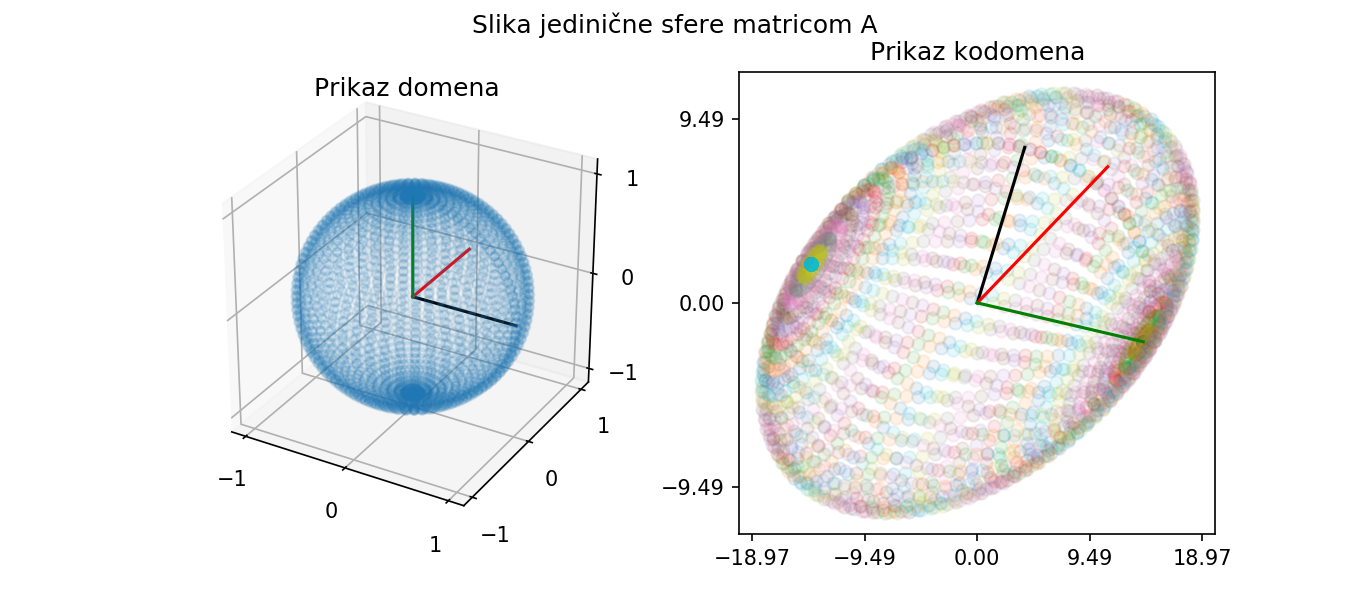

In [16]:
slika=plt.figure(figsize=(9,4)) 
slika.suptitle('Slika jedinične sfere matricom A')
slika.subplots_adjust(hspace=0.5)

ax1 = slika.add_subplot(1, 2, 1, projection='3d')
plt.title("Prikaz domena") 
ax1.set_xticks([-1, 0, 1])
ax1.set_yticks([-1, 0, 1])
ax1.set_zticks([-1, 0, 1])
#ax1.plot_surface(x, y, z , cmap=cm.gist_heat, alpha=0.5)
ax1.scatter(x,y,z, marker='o',alpha=0.1)
plt.plot([0,1],[0,0],[0,0],'-k')
plt.plot([0,0],[0,1],[0,0],'-r')
plt.plot([0,0],[0,0],[0,1],'-g');

ax2 = slika.add_subplot(1, 2, 2)
plt.title("Prikaz kodomena") 
plt.xticks([-sig_max,-sig_min, 0,sig_min, sig_max])
plt.yticks([-sig_max,-sig_min, 0,sig_min, sig_max])
#ax2.fill(Xs, Ys, color='C0',alpha=0.1)
plt.plot(Xs,Ys,'o',alpha=0.1)
plt.plot([0,A[0,0]],[0,A[1,0]],'-k')
plt.plot([0,A[0,1]],[0,A[1,1]],'-r')
plt.plot([0,A[0,2]],[0,A[1,2]],'-g');

plt.show()

In [17]:
%matplotlib inline

## Određivanje SVD

SV dekompozicija matrica je u tesnoj vezi sa Gramovom matricom $A^TA.$
Ukoliko je poznata $SVD$ matrice $A=U\Sigma V^T,$ tada je
\begin{align}
    A^TA&=(U\Sigma V^T)^T(U\Sigma V^T)=V\Sigma^T\Sigma V^T,\\
    AA^T&=(U\Sigma V^T)(U\Sigma V^T)^T=U\Sigma\Sigma^TU^T.
\end{align}
Drugim rečima, $V(\Sigma^T\Sigma) V^T$ je spektralna dekompozicija Gramove matrice kolona matrice $A,$ dok je $U(\Sigma\Sigma^T)U^T$ spektralna dekompozicija Gramove matrice vrsta matrice $A.$

Kako je $\Sigma_{r\times r}^T=\Sigma_{r\times r},$ to je
\begin{align}
\Sigma^T\Sigma&=\begin{bmatrix}\Sigma_{r\times r}&O_{r\times(m-r)}\\O_{(n-r)\times r}&O_{(n-r)\times(m-r)}\end{bmatrix}
\begin{bmatrix}\Sigma_{r\times r}&O_{r\times(n-r)}\\O_{(m-r)\times r}&O_{(m-r)\times(n-r)}\end{bmatrix}
=\begin{bmatrix}\Sigma_{r\times r}^2&O_{r\times(n-r)}\\O_{(n-r)\times r}&O_{(n-r)\times(n-r)}\end{bmatrix},\\
\Sigma\Sigma^T&=\begin{bmatrix}\Sigma_{r\times r}&O_{r\times(n-r)}\\O_{(m-r)\times r}&O_{(m-r)\times(n-r)}\end{bmatrix}
\begin{bmatrix}\Sigma_{r\times r}&O_{r\times(m-r)}\\O_{(n-r)\times r}&O_{(n-r)\times(m-r)}\end{bmatrix}
=\begin{bmatrix}\Sigma_{r\times r}^2&O_{r\times(m-r)}\\O_{(m-r)\times r}&O_{(m-r)\times(m-r)}\end{bmatrix}.
\end{align}

Zaključujemo da su sopstvene vrednosti matrice $A^TA$ jednake $\sigma_1^2,\dots,\sigma_r^2,\underbrace{0,\dots,0}_{n-r},$
a sopstvene vrednosti matrice $AA^T$ glase $\sigma_1^2,\dots,\sigma_r^2,\underbrace{0,\dots,0}_{m-r}.$ Vidimo da se spektri dve Gramove matrice razlikuju eventualno samo do na višestrukost sopstvene vrednosti $\lambda=0.$

Zbog toga algoritmi kojima se određuju sopstvene vrednosti i sopstveni vektori simetričnih matrica mogu da se iskoriste za nalaženje SVD. Prikazaćemo to na matrici $A$ iz primera 2.

**Primer 3.** Potražićemo sopstvene vrednosti i sopstvene vektore Gramovih matrica $A^TA$ i $AA^T,$ gde je $A=\begin{bmatrix}4&11&14\\8&7&-2\end{bmatrix}.$

In [18]:
A=np.array([[4,11.,14],[8,7,-2]])
G1=A.T@A
D1, V=np.linalg.eigh(G1)
perm=np.argsort(-D1)    #sortiranje sopstvenih vrednosti u opadajućem redosledu
D1=D1[perm]
V=V[:,perm]
print("Sp(A^TA):",np.round(D1,3))   
print("V=",V)

Sp(A^TA): [360.  90.  -0.]
V= [[ 0.33333333 -0.66666667 -0.66666667]
 [ 0.66666667 -0.33333333  0.66666667]
 [ 0.66666667  0.66666667 -0.33333333]]


In [19]:
np.round(V@np.diag(D1)@V.T-G1,3)  

array([[ 0.,  0.,  0.],
       [ 0., -0.,  0.],
       [ 0.,  0.,  0.]])

In [20]:
G2=A@A.T
np.linalg.eigvalsh(G2)

array([ 90., 360.])

Potvrdili smo da dva spektra imaju jednake nenula elemente i dobili ortogonalnu dekompoziciju matrice $A^TA.$
$$A^TA=\begin{bmatrix}80&100&40\\100&170&140\\40&140&200\end{bmatrix}, \quad
V=\begin{bmatrix}1/3&-2/3&2/3\\2/3&-1/3&-2/3\\2/3&2/3&1/3\end{bmatrix},\quad 
D=\begin{bmatrix}360&0&0\\0&90&0\\0&0&0\end{bmatrix}.$$ 
Matrica singularnih vrednosti je tada 
$$\Sigma=\begin{bmatrix}\sqrt{360}&0&0\\0&\sqrt{90}&0\end{bmatrix}=\begin{bmatrix}6\sqrt{10}&0&0\\0&3\sqrt{10}&0\end{bmatrix}$$ 

S obzirom na $A=U\Sigma V^T\quad\Longrightarrow\quad AV=U\Sigma,$ matricu $U$ nema potrebe da tražimo kroz sopstvene vrednosti i sopstvene vektore druge Gramove matrice $AA^T.$ Dovoljno je da skaliramo nenula kolone matrice $AV$ recipročnim singularnim vrednostima.
\begin{align}
AV&=\begin{bmatrix}4&11&14\\8&7&-2\end{bmatrix}\begin{bmatrix}1/3&-2/3&2/3\\2/3&-1/3&-2/3\\2/3&2/3&1/3\end{bmatrix}
\begin{bmatrix}18&3&0\\6&-9&0\end{bmatrix},\\
U&=\begin{bmatrix}\dfrac{18}{6\sqrt{10}}&\dfrac{3}{3\sqrt{10}}\\\dfrac{6}{6\sqrt{10}}&-\dfrac{9}{{3\sqrt{10}}}\end{bmatrix}
=\begin{bmatrix}\dfrac{3\sqrt{10}}{10}&\dfrac{\sqrt{10}}{10}\\\dfrac{\sqrt{10}}{10}&-\dfrac{3\sqrt{10}}{10}\end{bmatrix}.
\end{align}
Prostom proverom lako utvrđujemo da su kolone matrice $U$ zaista ortonormirani vektori. 

Proverimo izračunavanjima u konačnoj preciznosti.

In [21]:
sigma=np.sqrt(D1[:-1])
U=A@V
print("U=",np.round(U,3))
print("Sigma=",sigma)

U= [[18.  3. -0.]
 [ 6. -9.  0.]]
Sigma= [18.97366596  9.48683298]


In [22]:
U=U[:,:-1]
print("U=",np.round(U,3))

U= [[18.  3.]
 [ 6. -9.]]


In [23]:
U=U/sigma
print("U=",np.round(U,3))

U= [[ 0.949  0.316]
 [ 0.316 -0.949]]


In [24]:
np.round(U.T@U,3)  #provera ortogonalnosti matrice U

array([[1., 0.],
       [0., 1.]])

In [25]:
Sigma=np.diag(sigma,-1)[1:]    #kreiranje dijagonalne matrice sigma 2x3
print("Sigma=",Sigma)

Sigma= [[18.97366596  0.          0.        ]
 [ 0.          9.48683298  0.        ]]


In [26]:
np.round(U@Sigma@V.T-A,3)    #provera dekompozicije A=U Sigma V^T

array([[-0., -0.,  0.],
       [ 0., -0., -0.]])

Opisani postupak dobijanja $SVD$ se ne primenjuje u praksi, već se koriste algoritmi sopstvenih vrednosti i vektora koji ne računaju nijednu Gramovu matricu. Ipak, uspostavljena veza sa Gramovom matricom korisna je za dublje razumevanje teorijskih rezultata. 

Naredba kojom se dobija SVD u NumPy-u je `linalg.svd`. 

In [27]:
np.linalg.svd(A)

(array([[-0.9486833 , -0.31622777],
        [-0.31622777,  0.9486833 ]]),
 array([18.97366596,  9.48683298]),
 array([[-0.33333333, -0.66666667, -0.66666667],
        [ 0.66666667,  0.33333333, -0.66666667],
        [-0.66666667,  0.66666667, -0.33333333]]))

In [28]:
U, Sigma, VT=np.linalg.svd(A)
np.round(A-U@(np.diag(Sigma,-1)[1:])@VT,3)

array([[ 0., -0., -0.],
       [-0., -0.,  0.]])

In [29]:
m,n=rndm.randint(100,3000,(2,))
A=rndm.uniform(-5,5,(m,n))
U, Sigma, VT=np.linalg.svd(A)
print("m=",m,", n=",n)

m= 941 , n= 1364


In [30]:
if m<=n:
    print(np.all(np.isclose(A,U@(np.diag(Sigma,m-n)[n-m:])@VT)))
else:
    print(np.all(np.isclose(A,U@(np.diag(Sigma,m-n)[:,m-n:])@VT)))

True


Rezime prethodne analize i rezultata dat je narednim tvrđenjima.

**Teorema 1.** Neka je $A\in\mathcal{M}_{m\times n}$ pravougaona matrica i  $v_1,v_2,\dots,v_n$ ortonormirana baza sopstvenih vektora matrice $A^TA,$  koji odgovaraju redom sopstvenim vrednostima $\lambda_1\geq\lambda_2\geq\dots\geq\lambda_r>0,$ i $\lambda_{r+1}=\dots=\lambda_n=0.$ Tada skup $Av_1,Av_2,\dots,Av_r,$ predstavlja ortogonalnu bazu prostora $\mathcal{R}(A).$ Ortonormirana baza jezgra sastavljena je od vektora $v_{r+1},\dots,v_n.$

**Dokaz :**

Iz dokaza teoreme o Gramovoj matrici poznato je da je ${\rm rang}(A)={\rm rang}(A^TA)=r.$ Vektori $v_1,v_2,\dots,v_n\in\mathbb{R}^n$ čine ortonormiranu bazu sopstvenih vektora, pa za njih važi poznata relacija $v_i\cdot v_j=v_i^Tv_j=0,$ za $i\neq j.$ Zbog ortogonalnosti vektora $v_i$ je tada 
$$(Av_i)\cdot(Av_j)=(Av_i)^T(Av_j)=v_i^T(A^TAv_j)=v_i^T(\lambda_jv_j)=\lambda_j(v_i^Tv_j)=0,\quad i\neq j,$$
pa su i slike $Av_i$ i $Av_j$ ortogonalne među sobom. 

Zbog normiranosti vektora $v_i,$ tj. kako je $\|v_i\|^2=v_i^Tv_i=1,$ dalje važi
$$\|Av_i\|^2=(Av_i)^T(Av_i)=v_i^T(A^TAv_i)=v_i^T(\lambda_iv_i)=\lambda_i(v_i^Tv_i)=\lambda_i=\sigma_i^2.$$
Dakle, dužine slika $\|Av_i\|$ jednake su odgovarajućim singularnim vrednostima $\sigma_i=\sqrt{\lambda_i}.$ Kako je tačno $r$ prvih  sopstvenih vrednosti različito od nule, to je
$$\|Av_i\|=\sigma_i\neq0,\ i=1,2,\dots,r,
\qquad \|Av_i\|=0,\ i=r+1,\dots,n.$$

Zaključujemo da su vektori $Av_1,\dots,Av_r\in\mathcal{R}(A)$ ortogonalni ne-nula vektori, te su linearno nezavisni. Ima ih $r$ i ${\rm rang}(A)=r,$ to oni čine ortogonalnu bazu prostora slika matrice $A,$
$$\mathcal{L}(Av_1,\dots,Av_r)=\mathcal{R}(A),\qquad {\rm rang}(A)=r.$$
Preostale slike sopstvene baze su nula-vektori, $Av_{r+1}=\dots=Av_n=\theta,$
$$\Longrightarrow\quad \mathcal{L}(v_{r+1},\dots,v_n)=\mathcal{N}(A),\qquad {\rm def}(A)=n-r.\ \Box$$

**Posledica 1.** Neka je $A\in\mathcal{M}_{m\times n}$ pravougaona matrica i  $u_1,u_2,\dots,u_n$ ortonormirana baza sopstvenih vektora matrice $AA^T,$  koji odgovaraju redom sopstvenim vrednostima $\lambda_1\geq\lambda_2\geq\dots\geq\lambda_r>0,$ i $\lambda_{r+1}=\dots=\lambda_m=0.$ Tada skup $A^Tu_1,A^Tu_2,\dots,A^Tu_r,$ predstavlja ortogonalnu bazu prostora $\mathcal{R}(A^T).$ Ortonormirana baza jezgra $\mathcal{N}(A^T)$ sastavljena je od vektora $u_{r+1},\dots,u_m.$

**Teorema 2.** Za proizvoljnu matricu $A\in\mathcal{M}_{m\times n}$ ranga $r$ postoje ortogonalne matrice $U\in\mathcal{M}_{m\times m}$ i $V\in\mathcal{M}_{n\times n},$ i dijagonalna matrica $\Sigma\in\mathcal{M}_{m\times n}$ sa $r$ pozitivnih dijagonalnih vrednosti poređanih u nerastući redosled, tako da važi $$A=U\Sigma V^T.$$

**Dokaz :**

Neka su $\lambda_1\geq\lambda_2\geq\dots\geq\lambda_r>0$ i $\lambda_{r+1}=\dots=\lambda_n$ sopstvene vrednosti matrice $A^TA$ kojima odgovaraju sopstveni vektori $v_i,$ redom. Na osnovu teoreme 1, skup $\{Av_1,Av_2,\dots,Av_r\}$ obrazuje ortogonalnu bazu prostora kolona $\mathcal{R}(A).$ Normalizacijom $u_i=\dfrac{Av_i}{\|Av_i\|}=\dfrac{Av_i}{\sigma_i}$ dobija se ortonormirana baza $\mathcal{R}(A)=\mathcal{L}(u_1,u_2,\dots,u_r).$ Takođe, važi da je
$$Av_i=\sigma_iu_i,\quad i=1,2,\dots,r.$$ 

Dopunimo skup $\{u_1,u_2,\dots,u_r\}$ do ortonormirane baze $\{u_1,u_2,\dots,u_m\}$ prostora $\mathbb{R}^m,$ i označimo matrice $$U=\left[\begin{array}{c|c|c|c}
\phantom{w}&\phantom{w}&\phantom{w}&\phantom{w}\\
u_1&u_2&\dots&u_m\\ \phantom{w}&\phantom{w}&\phantom{w}&\phantom{w}
\end{array}\right]\qquad\mbox{i}\qquad 
V=\left[\begin{array}{c|c|c	|c}
\phantom{w}&\phantom{w}&\phantom{w}&\phantom{w}\\
v_1&v_2&\dots&v_n\\ \phantom{w}&\phantom{w}&\phantom{w}&\phantom{w}
\end{array}\right].$$

Prema konstrukciji, matrice $U$ i $V$ su ortogonalne i važi
\begin{align}AV&=\left[\begin{array}{c|c|c|c|c|c}
\phantom{w}&\phantom{w}&\phantom{w}&\phantom{w}&\phantom{w}&\phantom{w}\\ Av_1&\dots&Av_r&Av_{r+1}&\dots&Av_n\\ \phantom{w}&\phantom{w}&\phantom{w}&\phantom{w}&\phantom{w}&\phantom{w}
\end{array}\right]
=\left[\begin{array}{c|c|c|c|c|c}
\phantom{w}&\phantom{w}&\phantom{w}&\phantom{w}&\phantom{w}&\phantom{w}\\ \sigma_1u_1&\dots&\sigma_ru_r&\theta&\dots&\theta\\ \phantom{w}&\phantom{w}&\phantom{w}&\phantom{w}&\phantom{w}&\phantom{w}
\end{array}\right]
\\
&=\left[\begin{array}{c|c|c|c|c|c}
\phantom{w}&\phantom{w}&\phantom{w}&\phantom{w}&\phantom{w}&\phantom{w}\\
u_1&\dots&u_r&u_{r+1}&\dots&u_m\\ \phantom{w}&\phantom{w}&\phantom{w}&\phantom{w}&\phantom{w}&\phantom{w}
\end{array}\right]
\left[\begin{array}{c|c}
\begin{array}{cccc}
\sigma_1&0&\dots&0\\0&\sigma_2&\dots&0\\&&\ddots&\\0&0&\dots&\sigma_r
\end{array}&O_{r\times(n-r)}\\ \hline O_{(m-r)\times r}&O_{(m-r)\times(n-r)}
\end{array}\right]\\ &=U\Sigma.
\end{align}
Kako je $V$ orotogonalna matrica sledi da je $A=U\Sigma V^T.\quad\Box$

**Posledica 2.** Neka je $A=U\Sigma V^T$ poznata SV dekompozicija matrice $A$ ranga $r.$ Poređane singularne vrednosti glase $\sigma_1\geq\sigma_2\geq\dots\geq\sigma_r>0,$ a odgovarajući levi i desni singularni vektori su $u_1,u_2,\dots,u_r,$ i $v_1,v_2,\dots,v_r,$ redom. Tada za svaki normiran vektor $x\in\mathcal{L}(v_1,\dots,v_r)$ važi 
$$
\sigma_r\leq\|Ax\|\leq\sigma_1.
$$
Leva jednakost se postiže za $x=v_r.$ Slično, jednakost sa desne strane važi za $x=v_1.$

**Dokaz :**

Za $x=v_1$ znamo da je $$Ax=Av_1=\sigma_1u_1\quad\Longrightarrow\quad \|Ax\|=\|\sigma_1u_1\|=\sigma_1\underbrace{\|u_1\|}_1=\sigma_1.$$
Analogno za $x=v_r,$
$$Ax=Av_r=\sigma_ru_r\quad\Longrightarrow\quad \|Ax\|=\|\sigma_ru_r\|=\sigma_r\underbrace{\|u_r\|}_1=\sigma_r.$$

Neka je $x=x_1v_1+\dots+x_rv_r$ normiran vektor, tj. 
$$
\|x\|^2=x_1^2+\dots+x_r^2=1.$$
Zbog ortonormiranosti singularnih vektora $u_i$ tada je 
\begin{align}
\|Ax\|^2&=\|A(x_1v_1+\dots+x_rv_r)\|^2=\|x_1Av_1+\dots+x_rAv_r)\|^2\\
&=\|\sigma_1x_1u_1+\dots+\sigma_rx_ru_r\|^2=\sigma_1^2x_1^2\|u_1\|^2+\dots+\sigma_r^2x_r^2\|u_r\|^2\\
&=\sigma_1^2x_1^2+\dots+\sigma_r^2x_r^2.
\end{align}
Odatle se lako dobija
$$\min_i\{\sigma_i\}\underbrace{(x_1^2+\dots+x_r^2)}_1\leq
\sigma_1^2x_1^2+\dots+\sigma_r^2x_r^2\leq
\max_i\{\sigma_i\}\underbrace{(x_1^2+\dots+x_r^2)}_1,$$
pa slede tražene nejednakosti i jednakosti$.\ \Box$

**Posledica 3.** Za matricu $A=U\Sigma V^T$ i $\sigma_1\geq\sigma_2\geq\dots\geq\sigma_r>0,$ važi da je 
$$
\max_{\|x\|=1}\|Ax\|=\sigma_1
.$$

Pokazanu jednakost možemo da preformulišemo na sledeći način:

|      |
|------|
|Rešenje problema  $\displaystyle\max_{x\neq\theta}\dfrac{\|Ax\|}{\|x\|}$ je $\sigma_1=\dfrac{\|Av_1\|}{\|v_1\|}$|  


**Posledica 4.** Za matricu $A=U\Sigma V^T\in\mathcal{M}_{m\times n}$ i $\sigma_1\geq\sigma_2\geq\dots\geq\sigma_r>0,$ i odgovarajuće desne singularne vektore $v_1,v_2,\dots$ važi da je 
\begin{align}
&\max_{x\in v_1^{\perp},\ \|x\|=1}\|Ax\|=\sigma_2,\\
&\max_{x\in \{v_1,v_2\}^{\perp},\ \|x\|=1}\|Ax\|=\sigma_3,\\
&\vdots\\
&\max_{x\in \{v_1,\dots,v_j\}^{\perp},\ \|x\|=1}\|Ax\|=\sigma_{j+1},\quad j\leq r-1
.\end{align}

Niz jednakosti možemo da preformulišemo na sledeći način:

|      |
|------|
|Rešenje problema  $\displaystyle\max_{x\neq\theta}\dfrac{\|Ax\|}{\|x\|}$ pod uslovom $v_1^Tx=0$ je $\sigma_2=\dfrac{\|Av_2\|}{\|v_2\|}$|  
|Rešenje problema  $\displaystyle\max_{x\neq\theta}\dfrac{\|Ax\|}{\|x\|}$ pod uslovom $v_1^Tx=0$ i $v_2^Tx=0$ je $\sigma_3=\dfrac{\|Av_3\|}{\|v_3\|}$| 
| $$\vdots$$|
|Rešenje problema  $\displaystyle\max_{x\neq\theta}\dfrac{\|Ax\|}{\|x\|}$ pod uslovom $v_j^Tx=0,\ j\leq r-1$ je $\sigma_r=\dfrac{\|Av_r\|}{\|v_r\|}$| 

Interesantna posledica SV dekompozicije matrica je njihova polarna dekompozicija opisana narednim primerom.

**Primer 4.** Svaka realna kvadratna matrica je proizvod jedne ortogonalne i jedne simetrične pozitivno semidefinitne matrice.

Zaista, za proizvoljnu matricu $A\in\mathcal{M}_{n\times n}$ postoji SVD: $A=U\Sigma V^T$ sa orotogonalnim matricama $U$ i $V$ i dijagonalnom kvadratanom matricom $\Sigma$ čiji su dijagonalni elementi nenegativne vrednosti. Tada je 
$$A=U\Sigma V^T=UI\Sigma V^T=UV^TV\Sigma V^T=(UV^T)(V\Sigma V^T)=QS,$$
proizvod ortogonalne i simetrične matrice koju zovemo polarna dekompozicija matrice $A$

In [31]:
A=rndm.uniform(-5,5,(8,8))
U, Sigma, VT=np.linalg.svd(A)
Q, S=U@VT, VT.T@np.diag(Sigma)@VT

In [32]:
np.round(Q@Q.T,3)

array([[ 1.,  0., -0., -0., -0., -0., -0., -0.],
       [ 0.,  1.,  0., -0.,  0., -0., -0.,  0.],
       [-0.,  0.,  1.,  0.,  0., -0.,  0., -0.],
       [-0., -0.,  0.,  1.,  0., -0.,  0.,  0.],
       [-0.,  0.,  0.,  0.,  1., -0.,  0.,  0.],
       [-0., -0., -0., -0., -0.,  1.,  0.,  0.],
       [-0., -0.,  0.,  0.,  0.,  0.,  1., -0.],
       [-0.,  0., -0.,  0.,  0.,  0., -0.,  1.]])

In [33]:
np.all(np.isclose(S,S.T))

True

## Redukovana SVD

Neka je $A=U\Sigma V^T$ puna SVD matrice $A,$ gde su matrice date u 
 konformnoj blok podeli za množenje:
\begin{align}
U&=\begin{bmatrix}U_r&U_{m-r}\end{bmatrix}=
\begin{array}{c}\phantom{WWWWWW}\\
\left[\begin{array}{c|c|c|c|c|c}
\phantom{w}&\phantom{w}&\phantom{w}&\phantom{w}&\phantom{w}&\phantom{w}\\
u_1&\dots&u_r&u_{r+1}&\dots&u_m\\ 
\phantom{w}&\phantom{w}&\phantom{w}&\phantom{w}&\phantom{w}&\phantom{w}
\end{array}\right]\\
\underbrace{\phantom{WWWWWW}}_{U_r}\ 
\underbrace{\phantom{WWWWWW}}_{U_{m-r}}
\end{array},\qquad
V=\begin{bmatrix}V_r&V_{n-r}\end{bmatrix}=
\begin{array}{c}\phantom{WWWWWW}\\
\left[\begin{array}{c|c|c|c|c|c}
\phantom{w}&\phantom{w}&\phantom{w}&\phantom{w}&\phantom{w}&\phantom{w}\\
v_1&\dots&v_r&v_{r+1}&\dots&v_n\\ 
\phantom{w}&\phantom{w}&\phantom{w}&\phantom{w}&\phantom{w}&\phantom{w}
\end{array}\right]\\
\underbrace{\phantom{WWWWWW}}_{V_r}\ 
\underbrace{\phantom{WWWWWW}}_{V_{n-r}}
\end{array},\\
\Sigma&=\left[\begin{array}{c|c}
\Sigma_{r\times r}&O_{r\times(n-r)}\\ \hline O_{(m-r)\times r}&O_{(m-r)\times(n-r)}
\end{array}\right]=\left[\begin{array}{c|c}
\begin{array}{cccc}
\sigma_1&0&\dots&0\\0&\sigma_2&\dots&0\\&&\ddots&\\0&0&\dots&\sigma_r
\end{array}&O_{r\times(n-r)}\\ \hline O_{(m-r)\times r}&O_{(m-r)\times(n-r)}
\end{array}\right].
\end{align}

Tada punu SVD možemo da redukujemo na odgovarajuću dekompoziciju punog ranga koju zovemo redukovana SVD.
\begin{align}
A&=U\Sigma V^T=\begin{bmatrix}U_r&U_{m-r}\end{bmatrix}
\left[\begin{array}{c|c}
\Sigma_{r\times r}&O_{r\times(n-r)}\\ \hline O_{(m-r)\times r}&O_{(m-r)\times(n-r)}
\end{array}\right]
\begin{bmatrix}V_r^T\\V_{n-r}^T\end{bmatrix}=U_r\Sigma_{r\times r}V_r^T\\
&=\left[\begin{array}{c|c|c}
\phantom{w}&\phantom{w}&\phantom{w}\\
u_1&\dots&u_r\\ \phantom{w}&\phantom{w}&\phantom{w}
\end{array}\right]
\left[\begin{array}{cccc}
\sigma_1&0&\dots&0\\0&\sigma_2&\dots&0\\&&\ddots&\\0&0&\dots&\sigma_r
\end{array}\right]
\left[\begin{array}{c}
\phantom{WW}v_1^T\phantom{WW}\\\hline
\vdots\\\hline
\phantom{WW}v_r^T\phantom{WW}
\end{array}\right]\\
&=\sigma_1 u_1v_1^T+\sigma_2 u_2v_2^T+\dots+\sigma_r u_rv_r^T.
\end{align}

<div>
   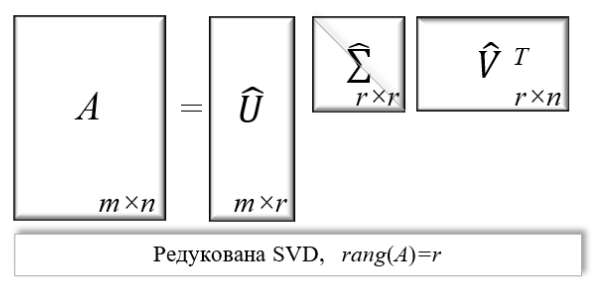  
</div> 

Pravilo množenja matrica preko spoljašnjeg proizvoda nam omogućava da svaku  matricu ranga $r$ predstavimo kao zbir $r$ matrica ranga $1,$ poređanih po 'težini' ili prema 'značaju' izraženim kroz veličine singularnih vrednosti.
$$A=\sigma_1 u_1v_1^T+\sigma_2 u_2v_2^T+\dots+\sigma_r u_rv_r^T.$$
Proizvodi $u_jv_j^T$ su spoljašnji proizvodi normiranih vektora, tj. vektora sa vrednostima pojedinačnih komponenti iz segmenta $[-1,1].$ Zbog toga su i elementi matrica $u_jv_j^T$ iz istog opsega. Ukoliko ih posmatarmo kao delove informacija koji utiču na konačan sadržaj matrice $A,$ bitnost informacija sadržanih u  $u_jv_j^T$ iskazana je singularnom vrednošću $\sigma_j.$ Što je ona veća to će sadržaj matrice $u_jv_j^T$ imati veći udeo u vrednostima matrice $A.$
Kada je $\sigma_j$ vrednost bliska nuli sadržaj informacija matrice $u_jv_j^T$ možemo da zanemarimo kao nebitnu za izgradnju vrednosti matrice $A.$

**Primer 5.** Potražićemo redukovanu SVD slučajno generisane matrice.

In [34]:
m,n=rndm.randint(100,3000,(2,))
A=rndm.uniform(0,2,(m,n))
U, Sigma, VT=np.linalg.svd(A,full_matrices=False)
print("m=",m,", n=",n)
print(U.shape)
print(Sigma.shape)
print(VT.shape)

m= 1612 , n= 1409
(1612, 1409)
(1409,)
(1409, 1409)


In [35]:
np.linalg.matrix_rank(A)

1409

In [36]:
perm=np.argsort(-Sigma)
(Sigma[perm])[0]   #najveća singularna vrednost

1507.5143482816447

In [37]:
(Sigma[perm])[-1]  #najmanja singularna vrednost

1.5308687938884502

U iste svrhe možemo da koristimo i odgovarajuće ugrađene funkcije SciPy biblioteke.

In [38]:
U, Sigma, VT=spl.svd(A,full_matrices=False)
print("m=",m,", n=",n)
print(U.shape)
print(Sigma.shape)
print(VT.shape)

m= 1612 , n= 1409
(1612, 1409)
(1409,)
(1409, 1409)


Osim toga, možemo da tražimo samo singularne vrednosti.

In [39]:
sigma=spl.svdvals(A)
print(sigma.shape)

(1409,)


Naredbom `scipy.linalg.diagsvd` kreiramo dijagonalnu matricu zadatih dimenzija sa dijagonalnim elementima iz ulaznog vektora.

In [40]:
Sigma=spl.diagsvd(sigma,m,n)
print(Sigma.shape)

(1612, 1409)


**Primer 6.** Neka je $A\in\mathcal{M}_{n\times n}$ regularna kvadratna matrica sa poznatom SV dekompozicijom $A=U\Sigma V^T.$ Matrica $\Sigma$ je kvadratna dijagonalna matrica sa pozitivnim vrednostima $\sigma_1,\dots,\sigma_n$ na glavnoj dijagonali. Rešenje sistema jednačina $Ax=b$ tada glasi
$$x=A^{-1}b=V\Sigma^{-1}U^Tb.$$
Jedino što može da krene loše sa gornjim izračunavanjem rešenja $x$ jeste da je neka od singularnih vrednosti matrice $A$ veoma bliska nuli. 

Kada je neka od vrednost $\sigma_i$ bliska mašinskoj nuli matricu $A$ zovemo skoro singularna matrica. Izračunavanje recipročne vrednosti $\dfrac{1}{\sigma_i}$ tada bude značajno promenjeno i najmanjim greškama zaokruživanja. Na taj način SVD daje dijagnozu problema. 

Problemi kod kojih male promene ulaznih parametara proizvode velike promene u izlaznim vrednostima nazivamo slabo uslovljeni problemi.

## Mur-Penrouzov inverz



**Definicija 1.** 	Za matricu $A\in\mathcal{M}_{m\times n}$ uopšteni inverz [Mur-Penrouza](https://en.wikipedia.org/wiki/Moore%E2%80%93Penrose_inverse) je matrica $A^+\in\mathcal{M}_{n\times m}$ koja zadovoljava uslove
$$
\begin{array}{ll}
    (1)\ AA^+A=A,      &(2)\ A^+AA^+=A^+,\\[6pt]
    (3)\ (AA^+)^T=AA^+,\hspace{2cm}      
    &(4)\ (A^+A)^T=A^+A.
\end{array}
$$
Jednakosti $(1)-(4)$ zovemo još i aksiome Mur-Penrouzovog inverza.

**Teorema 3.** Jednakosti $(1)-(4)$ definicije $1$ određuju jednoznačno matricu $A^+.$

**Dokaz :**

Pretpostavimo da za $A$ postoje dve matrice $B$ i $C$ koje zadovoljavaju jednakosti $(1)-(4),$ tada je
$$
\begin{array}{rl}
    AB\stackrel{(1)}{=}&(ACA)B=(AC)(AB)\stackrel{(3)}{=}(AC)^T(AB)^T
    =(ABAC)^T\\
    =&((ABA)C)^T\stackrel{(1)}{=}(AC)^T\stackrel{(3)}{=}AC.
    \end{array}
$$
Analogno se pokazuje da je i $BA=CA.$ Na osnovu ovih jednakosti imamo:
$$B\stackrel{(2)}{=}BAB=B(AB)\stackrel{AB=AC}{=}B(AC)=(BA)C
\stackrel{BA=CA}{=}(CA)C=CAC\stackrel{(2)}{=}C.\quad\Box$$

Ovo je veoma važno tvrđenje jedinstvenosti. Različite dekompozicije matrica omogućavaju različite načine opisivanja postupka izračunavanja Mur-Penrouzovog inverza. Ono po čemu se prepoznaje da dati izraz predstavlja matricu $A^+$ jeste da zadovoljava osobine $(1)-(4).$

Matrica  $A^+$ opravdano nosi ime uopštenog inverza jer se u slučaju regularne matrice $A$ poklapa sa $A^{-1}.$ 

**Teorema 4.**
Za regularnu matricu $A$ važi da je $A^+=A^{-1}.$

**Dokaz :**

Za inverznu matricu $A^{-1}$ jednakosti $(1)-(4)$ trivijalno važe $.\quad\Box$

**Primer 7.** Na osnovu $(1)-(4)$ i teoreme $4$ lako dolazimo do  Mur-Penrouzovog inverza nekih specijalnih oblika matrica.

- Ukoliko je $D={\rm diag}(d_1,\dots,d_k,0,\dots,0)\in\mathcal{M}_{m\times n}$ dijagonalna matrica i $d_i\neq0,$ tada je 
    $D^+={\rm diag}(d_1^{-1},\dots,d_k^{-1},0,\dots,0)\in\mathcal{M}_{n\times m}.$
    
- Za nula matricu $O\in\mathcal{M}_{m\times n}$ je $O^+=O\in\mathcal{M}_{n\times m}.$

- Za blok dijagonalnu matricu $D={\rm diag}(D_{m_1\times m_1},\dots,D_{m_k\times m_k},O)\in\mathcal{M}_{m\times m}$ sa regularnim kvadratnim blokovima $D_{m_i\times m_i},$ Mur-Penrouzov inverz je takođe blok dijagonalna matrica: 
    $D^+={\rm diag}(D_{m_1\times m_1}^{-1},\dots,D_{m_k\times m_k}^{-1},O)\in\mathcal{M}_{m\times m}.$

- Za blok dijagonalnu matricu $D={\rm diag}(D_{m_1\times n_1},\dots,D_{m_k\times n_k},O)\in\mathcal{M}_{m\times n},$  Mur-Penrouzov inverz je takođe blok dijagonalna matrica: 
$$D^+={\rm diag}(D_{m_1\times n_1}^{+},\dots,D_{m_k\times n_k}^{+},O)\in\mathcal{M}_{n\times m}.$$

Potražićemo ovaj inverz pomoću ugrađene funkcije Python-a za neke konkretne matrice.

In [41]:
D=np.diag([1,-1,2,-2.,0,0,2,-5])
np.linalg.pinv(D)

array([[ 1. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. , -1. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0.5,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. , -0.5,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0.5,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. , -0.2]])

In [42]:
O=np.zeros((2,3))
np.linalg.pinv(O)

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [43]:
Dblok=np.array([[1,1,0,0],[-1,1,0,0],[0,0,2,0],[0,0,0,1/3]])
np.linalg.pinv(Dblok)

array([[ 0.5, -0.5,  0. ,  0. ],
       [ 0.5,  0.5,  0. ,  0. ],
       [ 0. ,  0. ,  0.5,  0. ],
       [ 0. ,  0. ,  0. ,  3. ]])

In [44]:
np.array([[1,1],[-1,1]])@np.array([[1/2,-1/2],[1/2,1/2]])

array([[1., 0.],
       [0., 1.]])

**Primer 8.** Za realne matrice $A\in\mathcal{M}_{m\times n}$ i $A^+\in\mathcal{M}_{n\times m}$ važi
$$(A^T)^+=(A^+)^T,\qquad (A^TA)^+=A^+(A^+)^T,\qquad (A^TA)(A^TA)^+=A^+A.$$

Zaista,
\begin{align}
(1)\ &(AA^+A)^T=A^T\quad\Longleftrightarrow\quad A^T(A^+)^TA^T=A^T     \\
(2)\ &(A^+AA^+)^T=(A^+)^T\quad\Longleftrightarrow\quad (A^+)^TA^T(A^+)^T=(A^+)^T,\\
(3)\ &\big((A^+A)^T)^T=(A^+A)^T\quad\Longleftrightarrow\quad \big(A^T(A^+)^T\big)^T=A^T(A^+)^T,\\
(4)\ &\big((AA^+)^T\big)^T=(AA^+)^T\quad\Longleftrightarrow\quad \big((A^+)^TA^T\big)^T=(A^+)^TA^T.\\     
(A^TA)^+&=\big(A^T(A^T)^T\big)^+=\big((A^T)^+\big)^T(A^T)^+=\big((A^+)^T\big)^T(A^T)^+=A^+(A^+)^T.\\
    (A^TA)(A^TA)^+&=A^TAA^+(A^+)^T=A^T(AA^+)^T(A^+)^T=\big((A^+AA^+)A\big)^T=(A^+A)^T=A^+A.
\end{align}

In [45]:
np.linalg.pinv(Dblok.T)

array([[ 0.5,  0.5,  0. ,  0. ],
       [-0.5,  0.5,  0. ,  0. ],
       [ 0. ,  0. ,  0.5,  0. ],
       [ 0. ,  0. ,  0. ,  3. ]])

Na osnovu $SVD$ matrice $A$ dobijamo eksplicitni izraz za izračunavanje Mur-Penrouzovog inverza $A^+.$

**Teorema 5.** Neka je data $SV$ dekompozicija matrice $A.$ 
\begin{align}
A&=U\Sigma V^T\\
&=\left[\begin{array}{c|c|c|c}
\phantom{w}&\phantom{w}&\phantom{w}&\phantom{w}\\
u_1&u_2&\dots&u_m\\ \phantom{w}&\phantom{w}&\phantom{w}&\phantom{w}
\end{array}\right]
\left[\begin{array}{c|c}
\begin{array}{cccc}
\sigma_1&0&\dots&0\\0&\sigma_2&\dots&0\\
\vdots&\vdots&\ddots&\vdots\\0&0&\dots&\sigma_r
\end{array}&O_{r\times(n-r)}\\ \hline O_{(m-r)\times r}&O_{(m-r)\times(n-r)}
\end{array}\right]
\left[\begin{array}{c}
\phantom{WW}v_1^T\phantom{WW}\\\hline
\vdots\\\hline
\phantom{WW}v_n^T\phantom{WW}
\end{array}\right]    ,
\end{align}
odnosno redukovana 
\begin{align}
A&=U_{r}\Sigma_{r} V_{r}^T\\
&=\left[\begin{array}{c|c|c}
\phantom{w}&\phantom{w}&\phantom{w}\\
u_1&\dots&u_r\\ \phantom{w}&\phantom{w}&\phantom{w}
\end{array}\right]
\left[\begin{array}{cccc}
\sigma_1&0&\dots&0\\0&\sigma_2&\dots&0\\&&\ddots&\\0&0&\dots&\sigma_r
\end{array}\right]
\left[\begin{array}{c}
\phantom{WW}v_1^T\phantom{WW}\\\hline
\vdots\\\hline
\phantom{WW}v_r^T\phantom{WW}
\end{array}\right] .
\end{align}

Tada su poznate puna i redukovana  $SVD$ Mur-Penrouzovog inverza matrice $A,$
 \begin{align}
     A^+&=V\Sigma^+U^T\\
&=V
\left[\begin{array}{c|c}
\begin{array}{cccc}
\sigma_1^{-1}&0&\dots&0\\0&\sigma_2^{-1}&\dots&0\\\vdots&\vdots&\ddots&\vdots\\0&0&\dots&\sigma_r^{-1}
\end{array}&O_{r\times(m-r)}\\ \hline O_{(n-r)\times r}&O_{(n-r)\times(m-r)}
\end{array}\right]
U^T\\
&=V_r\Sigma_r^{-1}U_r^T\\
&=\left[\begin{array}{c|c|c}
\phantom{w}&\phantom{w}&\phantom{w}\\
v_1&\dots&v_r\\ \phantom{w}&\phantom{w}&\phantom{w}
\end{array}\right]
\left[\begin{array}{cccc}
\sigma_1^{-1}&0&\dots&0\\0&\sigma_2^{-1}&\dots&0\\&&\ddots&\\0&0&\dots&\sigma_r^{-1}
\end{array}\right]
\left[\begin{array}{c}
\phantom{WW}u_1^T\phantom{WW}\\\hline
\vdots\\\hline
\phantom{WW}u_r^T\phantom{WW}
\end{array}\right].
 \end{align}

**Dokaz :**

S obzirom na ekvivalenciju pune i redukovane SVD, dovoljno je pokazati da je izrazom $V_r\Sigma_r^{-1}U_r^T$ data redukovana SVD matrice $A^+,$ tj. da ovaj izraz zadovoljava jednakosti $(1)-(4)$ definicije $1.$ Podsetimo da zbog ortonormiranosti kolona matrice $U_r$ i $V_r$
važi $$U_r^TU_r=I_r,\qquad V_r^TV_r=I_r.$$ 

Zbog toga je
\begin{align}
&(1): AA^+A=A,      \\
AA^+A&=(U_r\Sigma_r \underbrace{V_r^T)(V_r}_{I_r}\Sigma_r^{-1}\underbrace{U_r^T)(U_r}_{I_r}\Sigma_r V_r^T)=
U_r\underbrace{\Sigma_r\Sigma_r^{-1}}_{I_r}\Sigma_r V_r^T=U_r\Sigma_rV_r^T=A,\\
&(2)\ A^+AA^+=A^+,\\
A^+AA^+&=(V_r\Sigma_r^{-1} \underbrace{U_r^T)(U_r}_{I_r}\Sigma_r\underbrace{V_r^T)(V_r}_{I_r}\Sigma_r^{-1} U_r^T)=
V_r\underbrace{\Sigma_r^{-1}\Sigma_r}_{I_r}\Sigma_r^{-1} U_r^T=V_r\Sigma_r^{-1}U_r^T=A^+\\
&(3)\ (AA^+)^T=AA^+,\\  
(AA^+)^T&=\big(A^+\big)^TA^T=\big(V_r\Sigma_r^{-1}U_r^T\big)^T\big(U_r\Sigma_rV_r^T\big)^T
=U_r\underbrace{\Sigma_r^{-1}V_r^TV_r\Sigma_r}_{I_r}U_r^T=U_rU_r^T=U_r\underbrace{\Sigma_rV_r^TV_r\Sigma_r^{-1}}_{I_r}U_r^T
=AA^+\\
&(4)\ (A^+A)^T=A^+A\\
(A^+A)^T&=A^T\big(A^+\big)^T=\big(U_r\Sigma_rV_r^T\big)^T\big(V_r\Sigma_r^{-1}U_r^T\big)^T
=V_r\underbrace{\Sigma_rU_r^TU_r\Sigma_r^{-1}}_{I_r}V_r^T=V_rV_r^T
=V_r\underbrace{\Sigma_r^{-1}U_r^TU_r\Sigma_r}_{I_r}V_r^T=A^+A.\quad \Box
\end{align}

**Primer 9.** Odredićemo Mur-Penrouzov inverz slučajno generisane matrice.

In [46]:
A=rndm.uniform(-2,2,(4,8))
Amp=np.linalg.pinv(A)
print("A=",np.round(A,3))
print("A^+=",np.round(Amp,3))

A= [[-1.147  1.037 -0.543  0.959  0.552 -1.864 -1.983 -0.987]
 [-1.549  0.276  1.49   1.041 -0.401  1.582  0.531  0.163]
 [-1.654  1.61  -0.697 -1.352  1.461  0.973  1.96  -0.986]
 [ 1.057 -1.611  1.085 -0.541  1.511 -1.652  1.704  0.434]]
A^+= [[-0.14  -0.192 -0.089 -0.015]
 [ 0.059 -0.021  0.106 -0.102]
 [ 0.041  0.257 -0.073  0.152]
 [ 0.109  0.185 -0.105  0.03 ]
 [ 0.106  0.007  0.11   0.154]
 [-0.188  0.067  0.028 -0.161]
 [-0.104  0.047  0.117  0.117]
 [-0.081  0.023 -0.073  0.01 ]]


In [47]:
np.all(np.isclose(A@Amp@A,A))

True

In [48]:
np.all(np.isclose(Amp@A@Amp,Amp))

True

In [49]:
np.all(np.isclose((A@Amp).T,A@Amp))

True

In [50]:
np.all(np.isclose((Amp@A).T,Amp@A))

True

Potražićemo sada Mur-Penouzov inverz preko SVD matrice $A.$

In [51]:
U,sigma,VT=spl.svd(A)
SigmaMP=spl.diagsvd(1/sigma,8,4)
AMP=VT.T@SigmaMP@U.T

In [52]:
np.all(np.isclose(A@AMP@A,A))

True

In [53]:
np.all(np.isclose(AMP@A@AMP,AMP))

True

In [54]:
np.all(np.isclose((A@AMP).T,A@AMP))

True

In [55]:
np.all(np.isclose((AMP@A).T,AMP@A))

True

In [56]:
np.all(np.isclose(Amp,AMP))

True

Na osnovu SVD dekompozicije matrice $A^+$ pojednostavljena je analiza geometrijskih svojstava preslikavanja indukovanog ovom matricom, tj. poznavanjem baza njenih fundamentalnih prostora.

\begin{align}
    A&=U\Sigma V^T=\begin{bmatrix}U_r&U_{m-r}\end{bmatrix}
    \left[\begin{array}{c|c}
\Sigma_{r\times r}&O_{r\times(n-r)}\\ \hline O_{(m-r)\times r}&O_{(m-r)\times(n-r)}
\end{array}\right]
\begin{bmatrix}V_r^T\\V_{n-r}^T\end{bmatrix}\\
\Longrightarrow&\quad \mathcal{R}(A)=\mathcal{R}(U_r),\qquad \mathcal{N}(A^T)=\mathcal{R}(A)^{\perp}=\mathcal{R}(U_{m-r}),\\
&\quad \mathcal{R}(A^T)=\mathcal{R}(V_r),\qquad \mathcal{N}(A)=\mathcal{R}(A^T)^{\perp}=\mathcal{R}(V_{n-r})
\end{align}

Slično tome, za matricu $A^+$ važi
\begin{align}
    A^+&=V\Sigma^+ U^T=\begin{bmatrix}V_r&V_{n-r}\end{bmatrix}
    \left[\begin{array}{c|c}
\Sigma_{r\times r}^{-1}&O_{r\times(n-r)}\\ \hline O_{(m-r)\times r}&O_{(m-r)\times(n-r)}
\end{array}\right]
\begin{bmatrix}U_r^T\\U_{m-r}^T\end{bmatrix}\\
\Longrightarrow&\quad\begin{cases}
\mathcal{R}(A^+)=\mathcal{R}(V_r)=\mathcal{R}(A^T)=\mathcal{N}(A)^{\perp},\qquad &\mathcal{N}\big((A^+)^T\big)=\mathcal{R}(A^+)^{\perp}=\mathcal{R}(V_{n-r})=\mathcal{N}(A),\\
\mathcal{R}\big((A^+)^T\big)=\mathcal{R}(U_r)=\mathcal{R}(A),\qquad &\mathcal{N}(A^+)=\mathcal{R}\big((A^+)^T\big)^{\perp}=\mathcal{R}(U_{m-r})=\mathcal{N}(A^T)=\mathcal{R}(A)^{\perp}.
\end{cases} 
\end{align}

<div>
   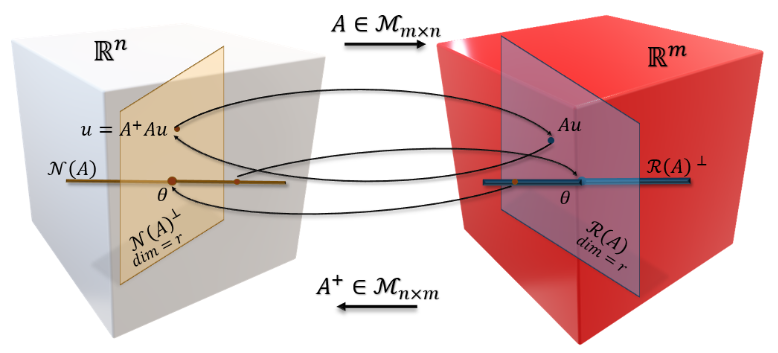  
</div> 

Zaključujemo da Mur-Penrouzov inverz $A^+$ predstavlja inverzno preslikavanje matrice $A$ koje deluje između potprostora $\mathcal{R}(A)$ i $\mathcal{R}(A^T),$ dok potprostor $\mathcal{R}(A)^{\perp}=\mathcal{N}(A^T)$ se sa $A^+$ slika u nula-vektor.

Jednakosti $(1)-(4)$ definicije $1$ pokazuju da su matrice $AA^+$ i $A^+A$ ortogonalne projekcije. Zaista, jednakosti $(3)$ i $(4)$ utvrđuju simetričnost ovih matrica $P=P^T,$ dok ososbine $(1)$ i $(2)$ garantuju idempotentnost $P^2=P.$
\begin{align}
	(AA^+)^2&=(AA^+)(AA^+)=(AA^+A)A^+\stackrel{(1)}{=}AA^+,\\
	(A^+A)^2&=(A^+A)(A^+A)=(A^+AA^+)A\stackrel{(2)}{=}A^+A.
\end{align}

Dekompozicije punog ranga matrica projekcija $AA^+\in\mathcal{M}_{m\times m},\ A^+A\in\mathcal{M}_{n\times n},$ opisuju fundamentalne prostore ovih matrica. 

Kako je $AA^+=U_rU_r^T$ zaključujemo da je $AA^+$ ortogonalna projekcija na prostor $\mathcal{R}(U_r)=\mathcal{R}(A).$ Jezgro ove projekcije je $$\mathcal{N}(AA^+)=\mathcal{R}(U_r)^{\perp}=\mathcal{R}(U_{m-r})=\mathcal{N}(A^T).$$
Primetimo da je dekompozicija punog ranga $AA^+=U_rU_r^T$ istovremeno i redukovana SVD ove matrice,
$$AA^+=U_rU_r^T=U_rI_rU_r^T.$$
Na osnovu toga je puna SVD matrice $AA^+$ jednaka 
$$AA^+=U\widehat{I} U^T=\begin{bmatrix}U_r&U_{m-r}\end{bmatrix}
    \left[\begin{array}{c|c}
I_{r\times r}&O_{r\times(m-r)}\\ \hline O_{(m-r)\times r}&O_{(m-r)\times(m-r)}
\end{array}\right]
\begin{bmatrix}U_r^T\\U_{m-r}^T\end{bmatrix},$$
što je istovremeno i spektralna dekompozicija matrice projekcije. Odatle lako zaključujemo da su jedine sopstvene vrednosti matrice projekcije $1$ i $0$ višestrukosti $r$ i $m-r,$ redom.

Slično, $A^+A=V_rV_r^T,$ pa je ovo ortogonalna projekcija na prostor $\mathcal{R}(V_r)=\mathcal{R}(A^T),$ sa jezgrom  
$$\mathcal{N}(A^+A)=\mathcal{R}(V_r)^{\perp}=\mathcal{R}(V_{n-r})=\mathcal{N}(A).$$
Dekompozicija punog ranga i redukovana SVD glase
$$A^+A=V_rV_r^T=V_rI_rV_r^T,$$
a puna SVD i spektralna dekompozicija glase
$$A^+A=V\widehat{I} V^T=\begin{bmatrix}V_r&V_{n-r}\end{bmatrix}
    \left[\begin{array}{c|c}
I_{r\times r}&O_{r\times(n-r)}\\ \hline O_{(n-r)\times r}&O_{(n-r)\times(n-r)}
\end{array}\right]
\begin{bmatrix}V_r^T\\V_{n-r}^T\end{bmatrix},$$

**Zadatak 1.** Za matricu $A$ punog ranga kolona, Mur-Penrouz inverz ima oblik $A^+=(A^TA)^{-1}A^T$ i predstavlja levi inverz matrice $A,$ odnosno važi
$$A^+A=I.$$ Slično, za matricu $B$ punog ranga vrsta, Mur-Penrouzov inverz glasi 
$B^+=B^T(BB^T)^{-1}$ i predstavlja desni inverz matrice $B,$
$$BB^+=I.$$
Dokazati.

**Rešenje :** Pokažimo da je $A^+=(A^TA)^{-1}A^T$ levi inverz: $A^+A{=}(A^TA)^{-1}A^TA=I.$

Pokažimo sada da $A^+=(A^TA)^{-1}A^T$ zadovoljava aksiome $(1)-(4).$
\begin{align}
    &(1)\quad A\underbrace{A^+A}_I=A,\\
    &(2)\quad \underbrace{A^+A}_IA^+=A^+,\\
    &(3)\quad (AA^+)^T=\big(A(A^TA)^{-1}A^T\big)^T
    =A(A^TA)^{-T}A^T=A(A^TA)^{-1}A^T=AA^+,\\
    &(4)\quad (A^+A)^T=I^T=I=A^+A.
\end{align}

Dokažimo da je $B^+$ desni inverz,
$$BB^+{=}BB^T(BB^T)^{-1}=I.$$
Pokažimo da važe osobine $(1)-(4)$ za matricu $B^+=B^T(BB^T)^{-1}:$
\begin{align}
    &(1)\quad \underbrace{BB^+}_IB=B,\\
    &(2)\quad B^+\underbrace{BB^+}_I=B^+,\\
    &(3)\quad (BB^+)^T=I^T=I=BB^+,\\
    &(4)\quad (B^+B)^T=\big(B^T(BB^T)^{-1}B\big)^T
    =B^T(BB^T)^{-T}B=B^T(BB^T)^{-1}B=B^+B.
\end{align}

Primetimo da nije bilo neophodno dokazivanje istih osobina za matricu $B.$ Transponovanjem se tvrđenje o matrici $A$ prenosi na matricu $B.$

**Zadatak 2.** Dokazati da za matricu $Q$ sa ortonormiranim kolonama $(Q^TQ=I)$ važi da je $Q^+=Q^T.$ Takođe, da za matricu $U$ sa ortonormiranim vrstama $(UU^T=I)$ važi da je $U^+=U^T.$

**Rešenje :**

Pokazaćemo tvrđenje samo za matrice sa ortonormiranim kolonama. Za matrice sa ortonormiranim vrstama dokaz ide analogno.
\begin{align}
    &(1)\quad Q\underbrace{Q^TQ}_I=Q,\\
    &(2)\quad \underbrace{Q^TQ}_IQ^T=Q^T,\\
    &(3)\quad (QQ^T)^T=QQ^T,\\
    &(4)\quad (Q^TQ)^T=I^T=I=Q^TQ.
\end{align}

**Zadatak 3.** Ako je $P\in\mathcal{M}_{n\times n}$ matrica ortogonalne projekcije tada je $P^+=P.$ Pokazati.

**Rešenje :**

Koristimo osobine ortogonalne projekcije $P^2=P=P^T.$
\begin{align}
    &(1),(2)\quad P\underbrace{P^2}_P=P^2=P,\\
    &(3)\quad (PP^T)^T=(P^2)^T=P^T=P=PP^T,\\
    &(4)\quad (P^TP)^T=(P^2)^T=P^T=P=P^TP.
\end{align}

**Zadatak 4.** Pokazati da za matrice $A\in\mathcal{M}_{m\times n}$ i $A^+\in\mathcal{M}_{n\times m}$ važi
$$(A^+)^+=A,\qquad (cA)^+=c^{-1}A^+,\ c\in\mathbb{R}\setminus\{0\}.$$

**Rešenje :**

Jednakost $(A^+)^+=A$ važi  na osnovu jedinstvenosti Mur-Penrouzovog inverza i na osnovu činjenice da su aksiome $(1)-(4)$ simetrične za matrice $A$ i $A^+.$ 

Označimo $X=cA$ i $X^+=c^{-1}A^+.$ Pokažimo da osobine $(1)-(4)$ važe za matrice $X$ i $X^+.$
\begin{align}
    &(1)\quad XX^+X=(cA)(c^{-1}A^+)(cA)=cc^{-1}c(AA^+A)=cA=X,\\
    &(2)\quad X^+XX^+=(c^{-1}A^+)(cA)(c^{-1}A^+)
    =c^{-1}cc^{-1}(A^+AA^+)=c^{-1}A^+=X^+,\\
    &(3)\quad (XX^+)^T=\big(cAc^{-1}A^+\big)^T=(AA^+)^T=AA^+=cAc^{-1}A^+=XX^+,\\
    &(4)\quad (X^+X)^T=\big(c^{-1}A^+cA\big)^T=(A^+A)^T
    =A^+A=c^{-1}A^+cA=X^+X.
\end{align}

S obzirom da inverzna matrice $A^{-1}$ figuriše u izrazu rešenja regularnog sistema linearnih jednačina, možemo da pretpostavimo da će generalizovani inverz figurisati u rešenju nesaglasnog sistema linearnih jednačina. To delimično potvrđuje zadatak 1, s obzirom da je u slučaju matrice $A$ punog ranga kolona rešenje problema najmanjih kvadrata $Ax=b$ dato izrazom $\hat{x}=(A^TA)^{-1}A^Tb=A^+b.$

## Problem najmanjih kvadrata

Problem najmanjih kvadrata predstavlja jednu od veoma bitnih tehnika u analizi podataka i mašinskom učenju. U radnoj svesci 19PrimenaQR analiziran je slučaj nesaglasnog sistema linearnih jednačina $Ax=b$ u kome je matrica sistema $A\in\mathcal{M}_{m\times n}$ punog ranga kolona, ${\rm rang}(A)=n.$ Rešenje problema najmanjih kvadrata koje minimizira normu rezidualnog vektora $\|r\|=\|b-Ax\|$ dobija se formulom $\widehat{x}=(A^TA)^{-1}A^Tb=A^+b.$ U primeru 4 radne sveske 19PrimenaQR ukazano je na problem koji se pojavljuje kada matrica sistema $A$ nije punog ranga kolona. Rešenje problema najmanjih kvadrata koje minimizira normu rezidualnog vektora nije jednoznačno određeno. Tačnije, postoji beskonačno mnogo rešenja ovako formulsanog problema najmanjih kvadrata. Zaista, ako je $x_0$ neko rešenje problema najmanjih kvadrata i $v\in\mathcal{N}(A)$ tada je rezidualni vektor za $x_0$ i $x_0+v$ isti,
$$\|b-A(x_0+v)\|=\|b-Ax_0+Av\|=\|b-Ax_0+\theta\|=\|b-Ax_0\|.$$

To se može objasniti i geometrijski. Rezidualni vektor će biti najmanji kada $Ax$ predstavlja ortogonalnu projekciju vektora $b$ na prostor kolona matrice $A,$ tj. 
$$Ax=AA^+b=\widehat{b}.\tag{1}$$ 
Rešenje problema najmanjih kvadrata se tada svodi na određivanje koeficijenata $x$ linearne kombinacije kolona matrice $A$ kojima se izražava vektor $\widehat{b}.$
Kako kolone matrice $A$ predstavljaju  potpun sistem vektora u $\mathcal{R}(A)$ to tražena linearna kombinacija sigurno postoji. S obzirom da su kolone linearno zavisne, takva linearna kombinacija nije jednoznačno određena, tj. postoji beskonačno mnogo načina za iskazivanje vektora  $\widehat{b}$ kao linearne kombinacije vektora-kolona.

Zbog toga se formulacija problema najmanjih kvadrata menja kako bi se obezbedila jednoznačnost rešenja.

<div class="alert alert-block alert-success">
<b>Problem najmanjih kvadrata :</b> 
    
Za matricu $A\in\mathcal{M}_{m\times n}$ i vektor $b\in\mathbb{R}^m$ rešenje problema najmanjih kvadrata jednačine $Ax=b$ predstavlja vektor $\widehat{x}\in\mathbb{R}^n$ minimalne norme za koji je rezidualni vektor minimalne norme takođe.
$$\|r\|=\|b-A\widehat{x}\|\leq\|b-Ax\|\quad\wedge\quad \|\widehat{x}\|\leq\|x\|,\qquad\forall x\in\mathbb{R}^n.$$    
</div>

**Teorema 6.** Rešenje problema najmanjih kvadrata najmanje norme dato je izrazom $\widehat{x}=A^+b.$

**Dokaz :**

Prvo primetimo da $\widehat{x}=A^+b$ zaista jeste rešenje jednačine $(1)$ jer je
$A\widehat{x}=AA^+b.$ Ostaje da pokažemo da je to rešenje minimalne norme. 

Neka je $x_0=\widehat{x}+v,\ v\in\mathcal{N}(A)$ proizvoljno rešenje jednačine $Ax=AA^+b.$ S  obzirom da je 
$$\widehat{x}\in\mathcal{R}(A^+)=\mathcal{N}(A)^{\perp}$$
to su vektori $\widehat{x}$ i $v$ međusobno ortogonalni. Zbog toga za normu vektora $x_0$ važi pitagorina teorema,
$$\|x_0\|^2=\|\widehat{x}+v\|^2=\|\widehat{x}\|^2+\|v\|^2\geq\|\widehat{x}\|^2.\quad\Box$$

Formulisani problem najmanjih kvadrata može da se iskaže i kao problem minimizacije funkcije 
$$\min_{x\in\mathbb{R}^n}\|b-Ax\|^2+\lambda\|x\|^2,\quad \lambda>0.$$
Dodatni član $\lambda\|x\|^2$ u izrazu koji se minimizira naziva se još i član regularizacije, a broj $\lambda$ je regularizaciona konstanta. 

**Primer 10.** Potražićemo rešenje nesaglasnog sistema naredbama za najamanje kvadrate i Mur-Penrouzov inverz. Sistem je dat u matričnom obliku $Ax=b,$ gde su
$$A=\begin{bmatrix}1&1&0&0\\1&1&0&0\\1&0&1&0\\1&0&1&0\\1&0&0&1\\1&0&0&1\end{bmatrix},\qquad b=\begin{bmatrix}-3\\-1\\0\\2\\5\\1\end{bmatrix}.$$

In [57]:
A=np.array([[1,1,0,0],[1,1,0,0],[1,0,1,0],[1,0,1,0],[1,0,0,1],[1,0,0,1]])
b=np.array([-3,-1,0,2,5,1])
np.linalg.lstsq(A, b, rcond=None)

(array([ 0.5, -2.5,  0.5,  2.5]),
 array([], dtype=float64),
 3,
 array([2.82842712e+00, 1.41421356e+00, 1.41421356e+00, 2.67184961e-16]))

In [58]:
Amp=np.linalg.pinv(A)
Amp@b

array([ 0.5, -2.5,  0.5,  2.5])

Rezidualni vektor ovog rešenja je:

In [59]:
b-A@Amp@b

array([-1.,  1., -1.,  1.,  2., -2.])